# Context

The overall idea is to replicate (or come as close as I can) Stewart et al.'s research on Personality Nuances. This line of research uses machine learning and advanced statistics to derive insights into whether items (nuances) have higher predictive scores than their higher-order facets or domains. 

The research paper I'm trying to replicate is <<https://doi.org/10.1111/jopy.12660>> but with a HEXACO dataset and with the outcome measure of self-reported GPA. The full reference for this paper is: Stewart, R. D., Mõttus, R., Seeboth, A., Soto, C. J., & Johnson, W. (2021). The finer details? The predictability of life outcomes from Big Five domains, facets, and nuances. Journal of Personality, 90(2).

In the referenced paper, it outlines the methodology which I will follow: "in the training samples, we set up elastic net regression models for each outcome (with 10-fold cross-validation and shrinkage parameter that minimized cross-validation error within these folds) with either the Big Five domains, their 15 facets, the residuals of the facets (i.e., the facet scores after controlling for the Big Five domains), the 60 items or the residuals of the items (controlling for the Big Five facets and thereby domains) as predictors. We obtained the residuals from linear models wherein. Each facet/item was regressed on all 5 domains/15facets, excluding the facet/item being residualized from the domain/facet at the time to avoid residualized it on itself."

# Set Up, Data Ingest, Initial Clean of Columns

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('hexaco-outcomes-MASTER-csv.csv')

In [3]:
df.head(2)

,id,age_years,sex_category,unigrade,smokingcateg,alcoholcateg,exercise,sleep,blooddonor,dentalbrush,...,hexaco_organization,hexaco_diligence,hexaco_perfectionism,hexaco_prudence,hexaco_aestheticappreciation,hexaco_inquisitiveness,hexaco_creativity,hexaco_unconventionality,hexaco_altruism,wave
0,0008c168885710b8b5601f4f13d2f0bd658c5a88,24.0,female,65%,none,infrequent drinker,6 times per week,8:00AM,Yes,two or three times per day,...,3.75,4.00,3.25,3.75,4.00,3.25,3.50,4.75,4.25,2019
1,0008f6a7a3b1dca0c417849e17682304,21.0,female,72%,0,infrequent drinker,0,11:00AM,No,twice per day,...,3.75,2.75,4.00,3.50,4.25,3.75,4.25,3.00,4.25,2018


In [4]:
print(list(df.columns))

['id', 'age_years', 'sex_category', 'unigrade', 'smokingcateg', 'alcoholcateg', 'exercise', 'sleep', 'blooddonor', 'dentalbrush', 'tattoonumber', 'musicinstryesno', 'church', 'heavymetal', 'ballet', 'football', 'publicprotest', 'hexaco6', 'hexaco29', 'hexaco4', 'hexaco3', 'hexaco2', 'hexaco1', 'hexaco12', 'hexaco11', 'hexaco82', 'hexaco33', 'hexaco8', 'hexaco7', 'hexaco42', 'hexaco17', 'hexaco16', 'hexaco39', 'hexaco62', 'hexaco37', 'hexaco48', 'hexaco47', 'hexaco46', 'hexaco45', 'hexaco20', 'hexaco43', 'hexaco54', 'hexaco53', 'hexaco52', 'hexaco51', 'hexaco74', 'hexaco73', 'hexaco60', 'hexaco35', 'hexaco106', 'hexaco57', 'hexaco80', 'hexaco79', 'hexaco138', 'hexaco41', 'hexaco112', 'hexaco63', 'hexaco134', 'hexaco85', 'hexaco120', 'hexaco71', 'hexaco70', 'hexaco69', 'hexaco44', 'hexaco67', 'hexaco78', 'hexaco125', 'hexaco148', 'hexaco99', 'hexaco146', 'hexaco97', 'hexaco132', 'hexaco107', 'hexaco130', 'hexaco81', 'hexaco128', 'hexaco127', 'hexaco162', 'hexaco65', 'hexaco160', 'hexaco1

In [5]:
df = df.drop(['id', 'smokingcateg', 'alcoholcateg', 'exercise', 'sleep', 
         'dentalbrush', 'tattoonumber', 'musicinstryesno', 'church', 
         'heavymetal', 'ballet', 'football', 'wave', 'blooddonor', 'publicprotest'], axis = 1)

In [6]:
df = df.dropna(how='any')

In [7]:
df.head(2)

,age_years,sex_category,unigrade,hexaco6,hexaco29,hexaco4,hexaco3,hexaco2,hexaco1,hexaco12,...,hexaco_patience,hexaco_organization,hexaco_diligence,hexaco_perfectionism,hexaco_prudence,hexaco_aestheticappreciation,hexaco_inquisitiveness,hexaco_creativity,hexaco_unconventionality,hexaco_altruism
0,24.0,female,65%,2.0,3.0,4.0,4.0,1.0,3.0,5.0,...,4.75,3.75,4.00,3.25,3.75,4.00,3.25,3.50,4.75,4.25
1,21.0,female,72%,2.0,4.0,4.0,4.0,4.0,3.0,4.0,...,4.00,3.75,2.75,4.00,3.50,4.25,3.75,4.25,3.00,4.25


In [8]:
print(df["unigrade"].dtype)

object


In [9]:
df["unigrade"] = df["unigrade"].str.replace('%', '').astype(float) / 100

In [10]:
print(df["unigrade"].dtype)

float64


In [11]:
dummies = pd.get_dummies(df['sex_category'], prefix='sex')
demos = pd.concat([df[['age_years']], dummies], axis=1)
demos = demos.astype(float)
demos.describe()

,age_years,sex_female,sex_male,sex_other
count,3830.000000,3830.000000,3830.000000,3830.000000
mean,25.547258,0.811749,0.183029,0.005222
std,8.401596,0.390963,0.386741,0.072083
min,18.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,0.000000,0.000000
50%,22.000000,1.000000,0.000000,0.000000
75%,28.000000,1.000000,0.000000,0.000000
max,86.000000,1.000000,1.000000,1.000000


In [12]:
df = df.drop(['age_years', 'sex_category'], axis = 1)
df.head(2)

,unigrade,hexaco6,hexaco29,hexaco4,hexaco3,hexaco2,hexaco1,hexaco12,hexaco11,hexaco82,...,hexaco_patience,hexaco_organization,hexaco_diligence,hexaco_perfectionism,hexaco_prudence,hexaco_aestheticappreciation,hexaco_inquisitiveness,hexaco_creativity,hexaco_unconventionality,hexaco_altruism
0,0.65,2.0,3.0,4.0,4.0,1.0,3.0,5.0,4.0,2.0,...,4.75,3.75,4.00,3.25,3.75,4.00,3.25,3.50,4.75,4.25
1,0.72,2.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,...,4.00,3.75,2.75,4.00,3.50,4.25,3.75,4.25,3.00,4.25


In [13]:
df.head()

,unigrade,hexaco6,hexaco29,hexaco4,hexaco3,hexaco2,hexaco1,hexaco12,hexaco11,hexaco82,...,hexaco_patience,hexaco_organization,hexaco_diligence,hexaco_perfectionism,hexaco_prudence,hexaco_aestheticappreciation,hexaco_inquisitiveness,hexaco_creativity,hexaco_unconventionality,hexaco_altruism
0,0.65,2.0,3.0,4.0,4.0,1.0,3.0,5.0,4.0,2.0,...,4.75,3.75,4.00,3.25,3.75,4.00,3.25,3.50,4.75,4.25
1,0.72,2.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,...,4.00,3.75,2.75,4.00,3.50,4.25,3.75,4.25,3.00,4.25
2,0.86,4.0,2.0,2.0,4.0,2.0,2.0,4.0,4.0,2.0,...,2.25,3.00,4.25,4.25,3.00,2.75,3.00,4.50,4.00,4.50
3,0.70,1.0,5.0,1.0,3.0,2.0,2.0,5.0,4.0,1.0,...,3.00,4.00,3.25,2.75,3.25,3.00,3.75,3.75,2.50,4.25
4,0.71,2.0,1.0,2.0,1.0,3.0,4.0,5.0,4.0,4.0,...,3.00,2.75,3.00,4.25,3.50,4.25,4.75,4.50,4.25,3.25


# Scoring and Creating Variables for Analysis

In [14]:
meta = pd.read_excel('hexaco-meta.xlsx')

In [15]:
meta.head(2)

,raw,rawtext,text,itemnumber,id,original_order,reversed,factor,facet,stringvar,hexaco60,hexaco100
0,CQ106Igenerallyacceptpeoplesfaultswithoutcompl...,Igenerallyacceptpeoplesfaultswithoutcomplainin...,I generally accept people's faults without com...,106,hexaco106,108,1,agreeableness,gentleness,string105,NaN,33
1,CQ112Iamusuallyquiteflexibleinmyopinionswhenpe...,Iamusuallyquiteflexibleinmyopinionswhenpeopled...,I am usually quite flexible in my opinions whe...,112,hexaco112,114,1,agreeableness,flexibility,string111,39.0,39


In [16]:
filtered_meta = meta[meta['reversed'] == -1]
print(filtered_meta[['id', 'reversed']].to_string(index=False))

       id  reversed
hexaco142        -1
hexaco148        -1
 hexaco16        -1
hexaco160        -1
hexaco172        -1
hexaco184        -1
 hexaco46        -1
 hexaco82        -1
hexaco107        -1
hexaco125        -1
hexaco131        -1
hexaco173        -1
hexaco191        -1
 hexaco41        -1
 hexaco47        -1
 hexaco71        -1
hexaco128        -1
hexaco134        -1
hexaco164        -1
hexaco170        -1
hexaco182        -1
 hexaco74        -1
 hexaco80        -1
hexaco165        -1
hexaco171        -1
hexaco177        -1
 hexaco33        -1
 hexaco39        -1
 hexaco93        -1
 hexaco99        -1
  hexaco1        -1
hexaco109        -1
hexaco139        -1
hexaco157        -1
hexaco175        -1
hexaco187        -1
  hexaco7        -1
 hexaco79        -1
 hexaco85        -1
 hexaco97        -1
hexaco132        -1
hexaco180        -1
hexaco186        -1
hexaco192        -1
 hexaco42        -1
 hexaco48        -1
 hexaco54        -1
  hexaco6        -1
hexaco199        -1


In [17]:
# reverse scoring these columns as per above
columns_to_map = ["hexaco16", "hexaco160", "hexaco184", "hexaco148", "hexaco172", "hexaco82", "hexaco46", 
    "hexaco142", "hexaco107", "hexaco131", "hexaco125", "hexaco173", "hexaco41", "hexaco47", 
    "hexaco71", "hexaco191", "hexaco80", "hexaco128", "hexaco134", "hexaco182", "hexaco74", 
    "hexaco170", "hexaco164", "hexaco93", "hexaco165", "hexaco39", "hexaco33", "hexaco177", 
    "hexaco99", "hexaco171", "hexaco7", "hexaco79", "hexaco175", "hexaco85", "hexaco109", 
    "hexaco157", "hexaco139", "hexaco187", "hexaco1", "hexaco97", "hexaco6", "hexaco54", 
    "hexaco42", "hexaco186", "hexaco132", "hexaco180", "hexaco48", "hexaco192", "hexaco199", 
    "hexaco200"
]

mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}

for col in columns_to_map:
    df[col] = df[col].map(mapping)

In [18]:
y = df[["unigrade"]]

In [19]:
x = df.drop(['unigrade'], axis=1)

In [20]:
print(x.dtypes)

hexaco6                           int64
hexaco29                        float64
hexaco4                         float64
hexaco3                         float64
hexaco2                         float64
                                 ...   
hexaco_aestheticappreciation    float64
hexaco_inquisitiveness          float64
hexaco_creativity               float64
hexaco_unconventionality        float64
hexaco_altruism                 float64
Length: 131, dtype: object


# Residuals - Setup

In [21]:
print(list(df.columns))

['unigrade', 'hexaco6', 'hexaco29', 'hexaco4', 'hexaco3', 'hexaco2', 'hexaco1', 'hexaco12', 'hexaco11', 'hexaco82', 'hexaco33', 'hexaco8', 'hexaco7', 'hexaco42', 'hexaco17', 'hexaco16', 'hexaco39', 'hexaco62', 'hexaco37', 'hexaco48', 'hexaco47', 'hexaco46', 'hexaco45', 'hexaco20', 'hexaco43', 'hexaco54', 'hexaco53', 'hexaco52', 'hexaco51', 'hexaco74', 'hexaco73', 'hexaco60', 'hexaco35', 'hexaco106', 'hexaco57', 'hexaco80', 'hexaco79', 'hexaco138', 'hexaco41', 'hexaco112', 'hexaco63', 'hexaco134', 'hexaco85', 'hexaco120', 'hexaco71', 'hexaco70', 'hexaco69', 'hexaco44', 'hexaco67', 'hexaco78', 'hexaco125', 'hexaco148', 'hexaco99', 'hexaco146', 'hexaco97', 'hexaco132', 'hexaco107', 'hexaco130', 'hexaco81', 'hexaco128', 'hexaco127', 'hexaco162', 'hexaco65', 'hexaco160', 'hexaco111', 'hexaco158', 'hexaco109', 'hexaco144', 'hexaco95', 'hexaco94', 'hexaco93', 'hexaco68', 'hexaco139', 'hexaco150', 'hexaco173', 'hexaco172', 'hexaco171', 'hexaco170', 'hexaco121', 'hexaco180', 'hexaco131', 'hexac

In [22]:
items = df[['hexaco6', 'hexaco29', 'hexaco4', 'hexaco3', 'hexaco2', 'hexaco1', 'hexaco12', 'hexaco11', 
'hexaco82', 'hexaco33', 'hexaco8', 'hexaco7', 'hexaco42', 'hexaco17', 'hexaco16', 'hexaco39', 'hexaco62', 
'hexaco37', 'hexaco48', 'hexaco47', 'hexaco46', 'hexaco45', 'hexaco20', 'hexaco43', 'hexaco54', 'hexaco53', 
'hexaco52', 'hexaco51', 'hexaco74', 'hexaco73', 'hexaco60', 'hexaco35', 'hexaco106', 'hexaco57', 'hexaco80', 
'hexaco79', 'hexaco138', 'hexaco41', 'hexaco112', 'hexaco63', 'hexaco134', 'hexaco85', 'hexaco120', 'hexaco71', 
'hexaco70', 'hexaco69', 'hexaco44', 'hexaco67', 'hexaco78', 'hexaco125', 'hexaco148', 'hexaco99', 'hexaco146', 
'hexaco97', 'hexaco132', 'hexaco107', 'hexaco130', 'hexaco81', 'hexaco128', 'hexaco127', 'hexaco162', 'hexaco65', 
'hexaco160', 'hexaco111', 'hexaco158', 'hexaco109', 'hexaco144', 'hexaco95', 'hexaco94', 'hexaco93', 'hexaco68', 
'hexaco139', 'hexaco150', 'hexaco173', 'hexaco172', 'hexaco171', 'hexaco170', 'hexaco121', 'hexaco180', 'hexaco131', 
'hexaco154', 'hexaco177', 'hexaco176', 'hexaco175', 'hexaco186', 'hexaco89', 'hexaco184', 'hexaco135', 'hexaco182', 
'hexaco157', 'hexaco192', 'hexaco191', 'hexaco142', 'hexaco165', 'hexaco164', 'hexaco187']]

In [23]:
facet = df[['hexaco_sincerity', 'hexaco_fairness', 'hexaco_greedavoidance', 
             'hexaco_modesty', 'hexaco_fearfulness', 'hexaco_anxiety', 'hexaco_dependence', 
             'hexaco_sentimentality', 'hexaco_socialselfesteem', 'hexaco_socialboldness', 
             'hexaco_sociability', 'hexaco_liveliness', 'hexaco_forgiveness', 'hexaco_gentleness', 
             'hexaco_flexibility', 'hexaco_patience', 'hexaco_organization', 'hexaco_diligence', 
             'hexaco_perfectionism', 'hexaco_prudence', 'hexaco_aestheticappreciation', 'hexaco_inquisitiveness', 
             'hexaco_creativity', 'hexaco_unconventionality']]

facet.columns = facet.columns.str.replace('hexaco_', '', regex=False)

In [24]:
domain = df[['hexaco_honestyhumility', 'hexaco_emotionality', 'hexaco_extraversion', 
              'hexaco_agreeableness', 'hexaco_conscientiousness', 'hexaco_openness']]

domain.columns = domain.columns.str.replace('hexaco_', '', regex=False)

In [25]:
outcome1 = df[['unigrade']]
outcome1.squeeze()

0       0.65
1       0.72
2       0.86
3       0.70
4       0.71
        ... 
4001    0.81
4002    0.70
4003    0.73
4004    0.75
4005    0.90
Name: unigrade, Length: 3830, dtype: float64

In [26]:
mapping_df = pd.read_excel('hexaco-meta.xlsx', sheet_name=2)
mapping_df = mapping_df.drop(['raw', 'rawtext', 'text', 'itemnumber', 'stringvar', 'hexaco60', 'hexaco100', 'reversed'], axis=1)

In [27]:
terms_to_remove = ['altruism', 'other']
mask = ~mapping_df.apply(lambda row: row.astype(str).str.contains('|'.join(terms_to_remove), case=False)).any(axis=1)
mapping_df = mapping_df[mask]

In [28]:
mapping_df

,id,factor,facet
0,hexaco1,honestyhumility,sincerity
1,hexaco2,emotionality,fearfulness
2,hexaco3,extraversion,socialselfesteem
3,hexaco4,agreeableness,forgiveness
4,hexaco6,openness,aestheticappreciation
...,...,...,...
91,hexaco184,agreeableness,flexibility
92,hexaco186,openness,creativity
93,hexaco187,honestyhumility,modesty
94,hexaco191,conscientiousness,prudence


In [29]:
item_to_facet = dict(zip(mapping_df['id'], mapping_df['facet']))

facet_to_domain = dict(zip(mapping_df['facet'], mapping_df['factor']))

In [30]:
from collections import defaultdict

# Assuming facet, items, and domain are your DataFrames
facet_df = facet  # Keep the original names, just for clarity in debugging
items_df = items
domain_df = domain

# Create mappings for domains to their corresponding facets and items
domain_to_facets = defaultdict(set)
domain_to_items = defaultdict(list)

# Populate the mappings using item_to_facet and facet_to_domain
for item, facet_name in item_to_facet.items():
    domain_name = facet_to_domain[facet_name]
    domain_to_facets[domain_name].add(facet_name)
    domain_to_items[domain_name].append(item)

# Convert sets to lists for consistency
domain_to_facets = {domain: list(facets) for domain, facets in domain_to_facets.items()}
domain_to_items = {domain: list(items) for domain, items in domain_to_items.items()}

# Debug print to verify columns
print(f"facet_df columns: {facet_df.columns.tolist()}")

# Dynamically create DataFrames for each domain's facets, items, and domain scores
for domain_name, facets_list in domain_to_facets.items():
    items_list = domain_to_items[domain_name]

    print(f"Processing domain: {domain_name}")
    print(f"Facets list: {facets_list}")
    print(f"Items list: {items_list}")

    # Check and create facets and items DataFrames
    if isinstance(facets_list, list) and all(isinstance(col, str) for col in facets_list):
        try:
            globals()[f'facets_{domain_name}_df'] = facet_df[facets_list]
            globals()[f'items_{domain_name}_df'] = items_df[items_list]
            print(f"Successfully created DataFrames for {domain_name}")
        except Exception as e:
            print(f"Error when creating DataFrames for {domain_name}: {e}")
    else:
        print(f"facets_list for domain {domain_name} is not valid: {facets_list}")

    # Create the domain DataFrame
    if domain_name in domain_df.columns:
        globals()[f'domain_{domain_name}_df'] = domain_df[[domain_name]]
        print(f"Successfully created domain DataFrame for {domain_name}")
    else:
        print(f"Domain column '{domain_name}' not found in domain_df.")

facet_df columns: ['sincerity', 'fairness', 'greedavoidance', 'modesty', 'fearfulness', 'anxiety', 'dependence', 'sentimentality', 'socialselfesteem', 'socialboldness', 'sociability', 'liveliness', 'forgiveness', 'gentleness', 'flexibility', 'patience', 'organization', 'diligence', 'perfectionism', 'prudence', 'aestheticappreciation', 'inquisitiveness', 'creativity', 'unconventionality']
Processing domain: honestyhumility
Facets list: ['fairness', 'sincerity', 'greedavoidance', 'modesty']
Items list: ['hexaco1', 'hexaco7', 'hexaco37', 'hexaco43', 'hexaco67', 'hexaco73', 'hexaco79', 'hexaco85', 'hexaco97', 'hexaco109', 'hexaco121', 'hexaco127', 'hexaco139', 'hexaco157', 'hexaco175', 'hexaco187']
Successfully created DataFrames for honestyhumility
Successfully created domain DataFrame for honestyhumility
Processing domain: emotionality
Facets list: ['fearfulness', 'sentimentality', 'anxiety', 'dependence']
Items list: ['hexaco2', 'hexaco8', 'hexaco20', 'hexaco44', 'hexaco62', 'hexaco68',

In [31]:
print(domain_honestyhumility_df.head())
print(facets_honestyhumility_df.head())
print(items_honestyhumility_df.head())

   honestyhumility
0           4.5625
1           3.0000
2           3.4375
3           3.4375
4           1.8125
   fairness  sincerity  greedavoidance  modesty
0      5.00       4.25            4.25     4.75
1      3.25       3.25            2.25     3.25
2      4.00       3.50            2.75     3.50
3      4.50       3.50            2.00     3.75
4      2.25       1.50            1.50     2.00
   hexaco1  hexaco7  hexaco37  hexaco43  hexaco67  hexaco73  hexaco79  \
0        3        5       4.0       5.0       5.0       4.0         5   
1        3        2       2.0       3.0       4.0       2.0         4   
2        4        4       2.0       2.0       4.0       2.0         4   
3        4        5       3.0       5.0       3.0       3.0         5   
4        2        2       3.0       2.0       2.0       1.0         2   

   hexaco85  hexaco97  hexaco109  hexaco121  hexaco127  hexaco139  hexaco157  \
0         4         5          5        5.0        5.0          5          4   

# Cronbach's Alpha

In [32]:
def cronbach_alpha(df):
    """
    Calculate Cronbach's alpha for a given DataFrame (df).
    Each column should be an item that contributes to the overall score.
    """
    item_variances = df.var(axis=0, ddof=1)
    total_variance = df.sum(axis=1).var(ddof=1)
    n_items = df.shape[1]
    
    alpha = n_items / (n_items - 1) * (1 - item_variances.sum() / total_variance)
    return alpha

# Calculate Cronbach's alpha for all domains
print("Cronbach's alpha for Domains:")
for domain_name in domain_to_items.keys():
    alpha = cronbach_alpha(globals()[f'items_{domain_name}_df'])
    print(f"{domain_name.capitalize()}: {alpha}")

# Calculate Cronbach's alpha for all facets
print("\nCronbach's alpha for Facets:")
for domain_name, facets_list in domain_to_facets.items():
    for facet in facets_list:
        # Get the items corresponding to the current facet
        items_in_facet = [item for item, facet_name in item_to_facet.items() if facet_name == facet]
        
        # Create a DataFrame for the facet
        facet_df = items_df[items_in_facet]
        
        # Calculate Cronbach's alpha for the facet
        alpha = cronbach_alpha(facet_df)
        print(f"{facet.capitalize()} (Domain: {domain_name.capitalize()}): {alpha}")

Cronbach's alpha for Domains:
Honestyhumility: 0.8253151967680442
Emotionality: 0.8265496688042876
Extraversion: 0.8683440353256683
Agreeableness: 0.8535743623558466
Openness: 0.8346814235593573
Conscientiousness: 0.8332243274885938

Cronbach's alpha for Facets:
Fairness (Domain: Honestyhumility): 0.7604922730366119
Sincerity (Domain: Honestyhumility): 0.6943628952211457
Greedavoidance (Domain: Honestyhumility): 0.8003116025532286
Modesty (Domain: Honestyhumility): 0.6761048847339445
Fearfulness (Domain: Emotionality): 0.6907617979296496
Sentimentality (Domain: Emotionality): 0.6823723887039828
Anxiety (Domain: Emotionality): 0.7414209512709387
Dependence (Domain: Emotionality): 0.7329733301751814
Liveliness (Domain: Extraversion): 0.76321458359616
Socialboldness (Domain: Extraversion): 0.7555189086410754
Sociability (Domain: Extraversion): 0.7365392332339225
Socialselfesteem (Domain: Extraversion): 0.7165241380501955
Flexibility (Domain: Agreeableness): 0.6416295987881019
Gentleness (

# Checks for Normality

## Normality for Predictors

In [33]:
from scipy.stats import shapiro

# Function to perform the Shapiro-Wilk test on a DataFrame
def shapiro_test(df):
    results = {}
    for column in df.columns:
        stat, p_value = shapiro(df[column])
        results[column] = {'statistic': stat, 'p-value': p_value}
    return results

# Perform the Shapiro-Wilk test for all domains
print("Shapiro-Wilk Test for Domains:")
for domain_name in domain_to_items.keys():
    print(f"\nDomain: {domain_name.capitalize()}")
    test_results = shapiro_test(globals()[f'items_{domain_name}_df'])
    for item, result in test_results.items():
        print(f"Item: {item}, Statistic: {result['statistic']:.4f}, p-value: {result['p-value']:.4f}")

# Perform the Shapiro-Wilk test for all facets
print("\nShapiro-Wilk Test for Facets:")
for domain_name, facets_list in domain_to_facets.items():
    for facet in facets_list:
        # Get the items corresponding to the current facet
        items_in_facet = [item for item, facet_name in item_to_facet.items() if facet_name == facet]
        
        # Create a DataFrame for the facet
        facet_df = items_df[items_in_facet]
        
        print(f"\nFacet: {facet.capitalize()} (Domain: {domain_name.capitalize()})")
        test_results = shapiro_test(facet_df)
        for item, result in test_results.items():
            print(f"Item: {item}, Statistic: {result['statistic']:.4f}, p-value: {result['p-value']:.4f}")

Shapiro-Wilk Test for Domains:

Domain: Honestyhumility
Item: hexaco1, Statistic: 0.8898, p-value: 0.0000
Item: hexaco7, Statistic: 0.8783, p-value: 0.0000
Item: hexaco37, Statistic: 0.8926, p-value: 0.0000
Item: hexaco43, Statistic: 0.8541, p-value: 0.0000
Item: hexaco67, Statistic: 0.8224, p-value: 0.0000
Item: hexaco73, Statistic: 0.8853, p-value: 0.0000
Item: hexaco79, Statistic: 0.8099, p-value: 0.0000
Item: hexaco85, Statistic: 0.9129, p-value: 0.0000
Item: hexaco97, Statistic: 0.8588, p-value: 0.0000
Item: hexaco109, Statistic: 0.8975, p-value: 0.0000
Item: hexaco121, Statistic: 0.8557, p-value: 0.0000
Item: hexaco127, Statistic: 0.8937, p-value: 0.0000
Item: hexaco139, Statistic: 0.8099, p-value: 0.0000
Item: hexaco157, Statistic: 0.9042, p-value: 0.0000
Item: hexaco175, Statistic: 0.8284, p-value: 0.0000
Item: hexaco187, Statistic: 0.8544, p-value: 0.0000

Domain: Emotionality
Item: hexaco2, Statistic: 0.8829, p-value: 0.0000
Item: hexaco8, Statistic: 0.7894, p-value: 0.0000
I

In [34]:
from scipy.stats import skew, kurtosis

# Function to calculate skewness and kurtosis for a Series
def skew_kurtosis(series):
    skewness = skew(series, nan_policy='omit')
    kurt = kurtosis(series, nan_policy='omit')
    return skewness, kurt

# Calculate skewness and kurtosis for the total score of each domain
print("Skewness and Kurtosis for Domain Scores:")

for domain_name in domain_to_items.keys():
    # Aggregate items within the domain to calculate the total score for each domain
    domain_scores = globals()[f'items_{domain_name}_df'].sum(axis=1)
    
    # Calculate skewness and kurtosis for the domain scores
    skewness, kurt_value = skew_kurtosis(domain_scores)
    
    # Output the results
    print(f"{domain_name.capitalize()} - Skewness: {skewness:.4f}, Kurtosis: {kurt_value:.4f}")

Skewness and Kurtosis for Domain Scores:
Honestyhumility - Skewness: -0.3383, Kurtosis: 0.2650
Emotionality - Skewness: -0.3884, Kurtosis: 0.1255
Extraversion - Skewness: -0.2297, Kurtosis: -0.1206
Agreeableness - Skewness: -0.1713, Kurtosis: -0.1182
Openness - Skewness: -0.2685, Kurtosis: -0.1870
Conscientiousness - Skewness: -0.2614, Kurtosis: -0.0957


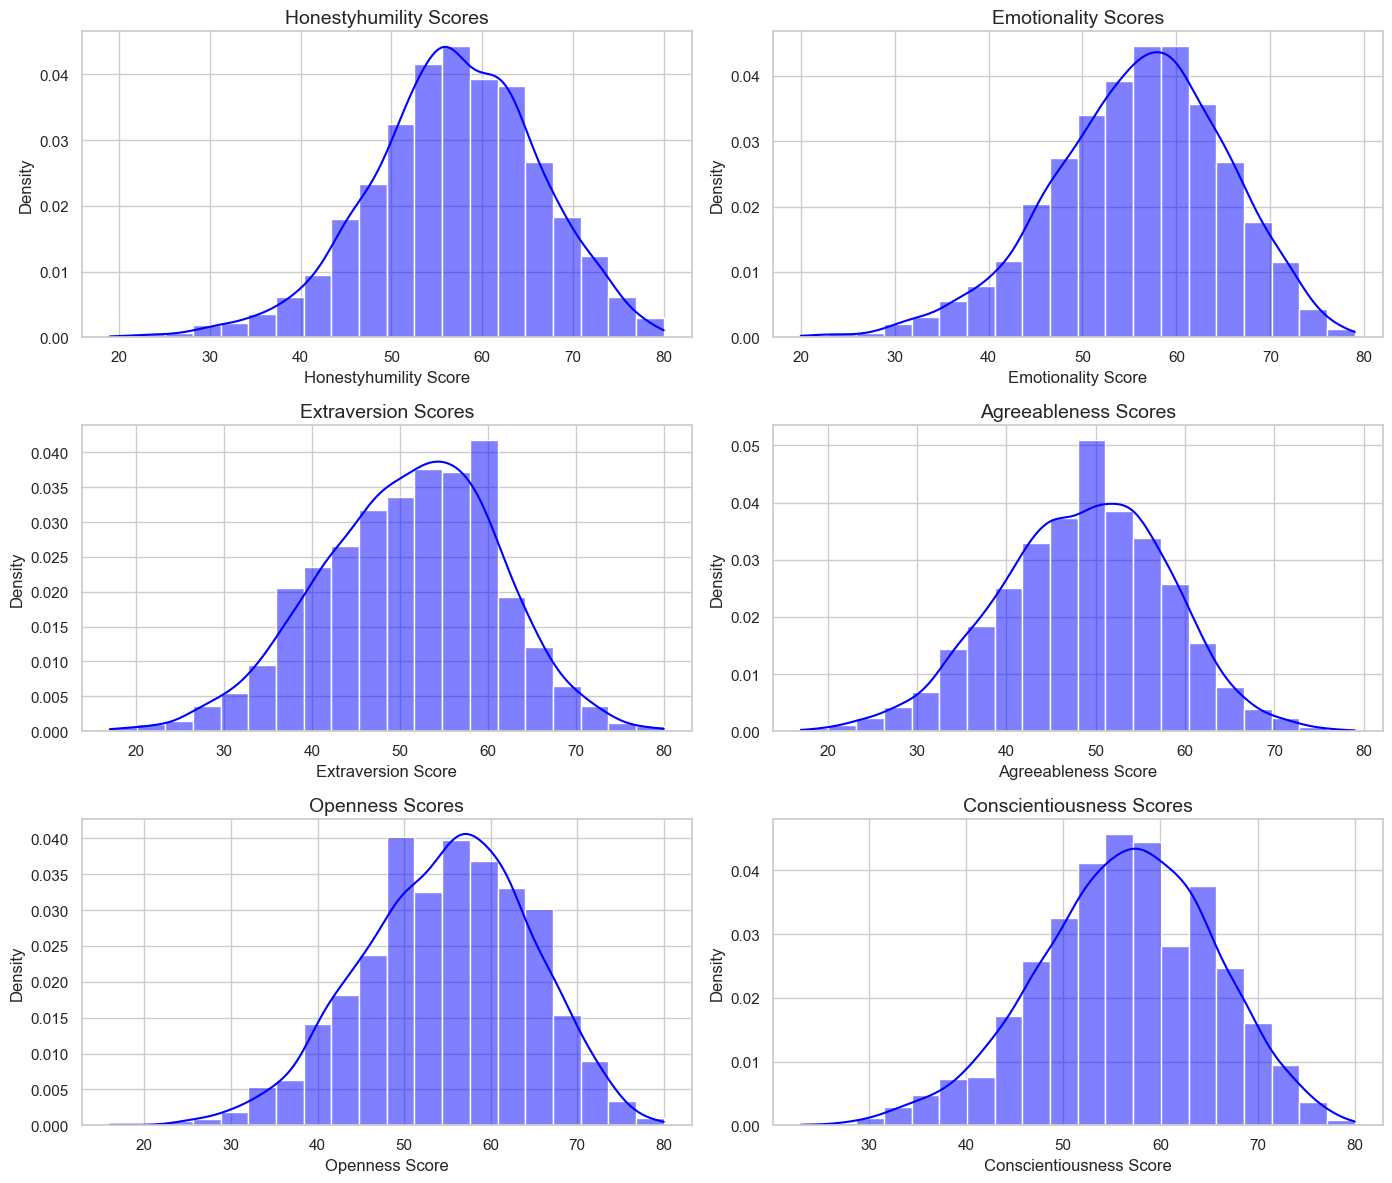

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Number of domains
num_domains = len(domain_to_items.keys())

# Create subplots - a grid of plots with 2 columns
fig, axes = plt.subplots(nrows=(num_domains + 1) // 2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Plot the distributions for each domain
for i, domain_name in enumerate(domain_to_items.keys()):
    # Aggregate items within the domain to calculate the total score for each domain
    domain_scores = globals()[f'items_{domain_name}_df'].sum(axis=1)
    
    # Plot the distribution in the subplot
    sns.histplot(domain_scores, kde=True, bins=20, color='blue', stat='density', ax=axes[i])
    axes[i].set_title(f'{domain_name.capitalize()} Scores', fontsize=14)
    axes[i].set_xlabel(f'{domain_name.capitalize()} Score', fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

# Adjust layout
plt.tight_layout()

# If there are any unused subplots, remove them
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

## Normality for Outcome Data

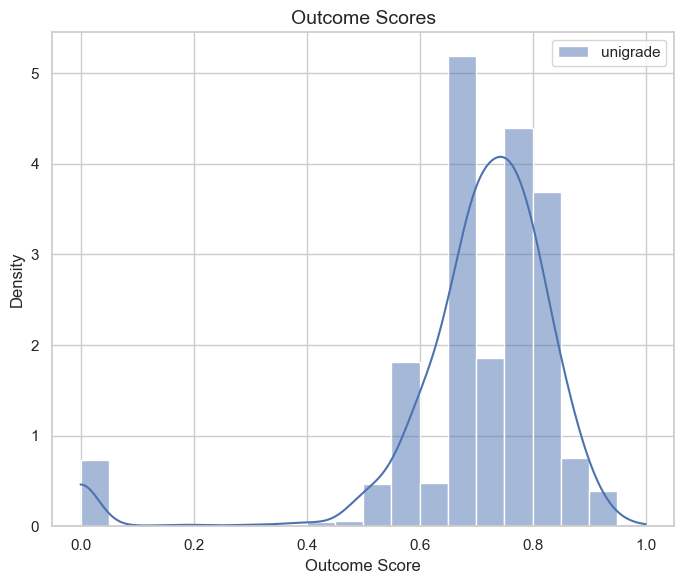

In [36]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(7, 6))
sns.set(style="whitegrid")

# Plot the distribution of the outcome variable 'y' using Seaborn
sns.histplot(y, kde=True, bins=20, color='blue', stat='density', ax=ax)

# Add labels and title to match the style of your other plots
ax.set_title('Outcome Scores', fontsize=14)
ax.set_xlabel('Outcome Score', fontsize=12)
ax.set_ylabel('Density', fontsize=12)

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()

In [37]:
from scipy.stats import kstest

# Test if the data follows a normal distribution
stat, p_value = kstest(y, 'norm')
print(f'K-S Test: Statistics={stat}, p-value={p_value}')
if p_value > 0.05:
    print("The data is normally distributed (fail to reject H0)")
else:
    print("The data is not normally distributed (reject H0)")

K-S Test: Statistics=[0.64446507], p-value=[0.]
The data is not normally distributed (reject H0)


In [38]:
skewness_outcome = skew(y, nan_policy='omit')
kurt_outcome = kurtosis(y, nan_policy='omit')

# Calculate skewness and kurtosis for the outcome variable
print(f"Kurtosis for Outcome Scores: {kurt_outcome}")
print(f"Skewness for Outcome Scores: {skewness_outcome}")

Kurtosis for Outcome Scores: [9.05538245]
Skewness for Outcome Scores: [-2.74177298]


# Common Method Bias

In [39]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def pca_single_factor_test(df):
    """
    Conduct PCA and return the percentage of variance explained by the first principal component.
    """
    pca = PCA(n_components=1)
    pca.fit(df)
    variance_explained = pca.explained_variance_ratio_[0]
    return variance_explained * 100  # Convert to percentage

# Calculate PCA for all domains and aggregate the results
domain_variances = []

print("PCA for Domains:")
for domain_name in domain_to_items.keys():
    domain_df = globals()[f'items_{domain_name}_df']
    variance_explained = pca_single_factor_test(domain_df)
    domain_variances.append(variance_explained)
    print(f"{domain_name.capitalize()}: {variance_explained:.2f}% variance explained by the first component")

average_domain_variance = np.mean(domain_variances)
print(f"\nAverage variance explained by the first component across all domains: {average_domain_variance:.2f}%")

# Calculate PCA for all facets and aggregate the results
facet_variances = []

print("\nPCA for Facets:")
for domain_name, facets_list in domain_to_facets.items():
    for facet in facets_list:
        # Get the items corresponding to the current facet
        items_in_facet = [item for item, facet_name in item_to_facet.items() if facet_name == facet]
        
        # Create a DataFrame for the facet
        facet_df = items_df[items_in_facet]
        
        variance_explained = pca_single_factor_test(facet_df)
        facet_variances.append(variance_explained)
        print(f"{facet.capitalize()} (Domain: {domain_name.capitalize()}): {variance_explained:.2f}% variance explained by the first component")

average_facet_variance = np.mean(facet_variances)
print(f"\nAverage variance explained by the first component across all facets: {average_facet_variance:.2f}%")

PCA for Domains:
Honestyhumility: 28.95% variance explained by the first component
Emotionality: 28.59% variance explained by the first component
Extraversion: 34.58% variance explained by the first component
Agreeableness: 32.57% variance explained by the first component
Openness: 31.08% variance explained by the first component
Conscientiousness: 29.72% variance explained by the first component

Average variance explained by the first component across all domains: 30.92%

PCA for Facets:
Fairness (Domain: Honestyhumility): 61.08% variance explained by the first component
Sincerity (Domain: Honestyhumility): 52.39% variance explained by the first component
Greedavoidance (Domain: Honestyhumility): 63.27% variance explained by the first component
Modesty (Domain: Honestyhumility): 51.34% variance explained by the first component
Fearfulness (Domain: Emotionality): 51.97% variance explained by the first component
Sentimentality (Domain: Emotionality): 52.96% variance explained by the fi

# Results - Elastic Net Regression

## Residuals

In [40]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Function to calculate residuals excluding the target from the predictors
def calculate_residuals_excluding_target(X, y):
    residuals = pd.DataFrame(index=y.index, columns=y.columns)
    for col in y.columns:
        X_excluding_target = X.drop(columns=[col], errors='ignore')
        model = LinearRegression()
        model.fit(X_excluding_target, y[[col]])
        predictions = model.predict(X_excluding_target)
        residuals[col] = y[col] - predictions.ravel()
    return residuals

# Create dictionaries to store residuals for items and facets
item_residuals = {}
facet_residuals = {}

# Loop through each domain to calculate and store residuals for items and facets
for domain_name in domain_to_items.keys():
    # Items DataFrame for the domain
    items_df = globals()[f'items_{domain_name}_df']
    
    # Facets DataFrame for the domain
    facets_df = globals()[f'facets_{domain_name}_df']
    
    # Domain score DataFrame for the domain (used as part of the predictors for facets)
    domain_df = pd.concat([globals()[f'domain_{d}_df'] for d in domain_to_items.keys()], axis=1)
    
    # Calculate residuals for facets: regress each facet on all domains
    facets_residuals_df = calculate_residuals_excluding_target(domain_df, facets_df)
    facet_residuals[domain_name] = facets_residuals_df
    
    # Calculate residuals for items: regress each item on all facets and all domains
    combined_predictors = pd.concat([domain_df, facets_df], axis=1)
    
    # Correctly exclude the item itself from the predictors
    def calculate_item_residuals(X, y):
        residuals = pd.DataFrame(index=y.index, columns=y.columns)
        for col in y.columns:
            X_excluding_item = X.drop(columns=[col], errors='ignore')
            model = LinearRegression()
            model.fit(X_excluding_item, y[[col]])
            predictions = model.predict(X_excluding_item)
            residuals[col] = y[col] - predictions.ravel()
        return residuals
    
    items_residuals_df = calculate_item_residuals(combined_predictors, items_df)
    item_residuals[domain_name] = items_residuals_df
    
    # Print confirmation
    print(f"Calculated and stored residuals for {domain_name.capitalize()}")

Calculated and stored residuals for Honestyhumility
Calculated and stored residuals for Emotionality
Calculated and stored residuals for Extraversion
Calculated and stored residuals for Agreeableness
Calculated and stored residuals for Openness
Calculated and stored residuals for Conscientiousness


In [42]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
from sklearn.exceptions import ConvergenceWarning
import warnings

# Function to perform Elastic Net regression with debug statements
def elastic_net_regression(X, y, label=""):
    model = ElasticNetCV(cv=10, random_state=42, max_iter=10000, tol=0.0001, n_alphas=250, l1_ratio=0.5)
    
    try:
        with warnings.catch_warnings(record=True) as w:
            warnings.simplefilter("always", ConvergenceWarning)
            model.fit(X, y.values.ravel())  # Fit the model directly on the original predictors
            
            if any([issubclass(warn.category, ConvergenceWarning) for warn in w]):
                print(f"Model did not converge for {label}.")

        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
    
    except Exception as e:
        print(f"Error in model fitting for {label}: {str(e)}")
        r2 = None
    
    return model, r2

# Prepare the combined data for all domains, facets, residuals, and items
def prepare_combined_data():
    all_domains = pd.concat([globals()[f'domain_{d}_df'] for d in domain_to_items.keys()], axis=1)
    all_facets = pd.concat([globals()[f'facets_{d}_df'] for d in domain_to_items.keys()], axis=1)
    all_items = pd.concat([globals()[f'items_{d}_df'] for d in domain_to_items.keys()], axis=1)

    # Residuals
    all_facets_residuals = pd.concat([facet_residuals[d] for d in domain_to_items.keys()], axis=1)
    all_items_residuals = pd.concat([item_residuals[d] for d in domain_to_items.keys()], axis=1)

    return all_domains, all_facets, all_facets_residuals, all_items, all_items_residuals

# Function to run Elastic Net regression on all levels (without bootstrapping)
def run_elastic_net():
    # Prepare combined data
    all_domains, all_facets, all_facets_residuals, all_items, all_items_residuals = prepare_combined_data()

    # Store R² results for each level
    results = {}

    # Elastic Net on all domains
    model, r2 = elastic_net_regression(all_domains, outcome1)
    results['all_domains'] = r2
    
    # Elastic Net on all facets
    model, r2 = elastic_net_regression(all_facets, outcome1)
    results['all_facets'] = r2
    
    # Elastic Net on all facet residuals
    model, r2 = elastic_net_regression(all_facets_residuals, outcome1)
    results['all_facets_residuals'] = r2
    
    # Elastic Net on all items
    model, r2 = elastic_net_regression(all_items, outcome1)
    results['all_items'] = r2
    
    # Elastic Net on all item residuals
    model, r2 = elastic_net_regression(all_items_residuals, outcome1)
    results['all_items_residuals'] = r2

    # Print R² for each level
    for key in results:
        print(f"R² for {key.replace('_', ' ').capitalize()}: {results[key]:.4f}")

    return results

# Run the Elastic Net regression without bootstrapping
elastic_net_results = run_elastic_net()

Model did not converge for .
R² for All domains: 0.0271
R² for All facets: 0.0531
R² for All facets residuals: 0.0259
R² for All items: 0.0857
R² for All items residuals: 0.0542


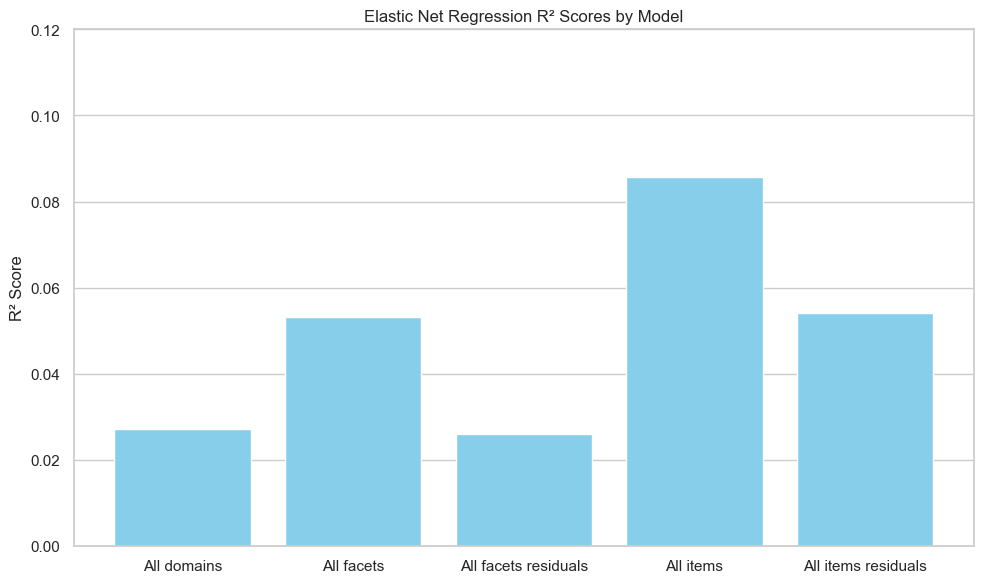

In [51]:
import matplotlib.pyplot as plt

def plot_elastic_net_results(results):
    # Extract keys and values from the results dictionary
    labels = [key.replace('_', ' ').capitalize() for key in results.keys()]
    r2_scores = list(results.values())

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(labels, r2_scores, color='skyblue')

    # Add labels and title
    plt.ylabel('R² Score')
    plt.title('Elastic Net Regression R² Scores by Model')
    plt.xticks(rotation=0)
    plt.ylim(0, .12) 
    plt.grid(axis='x')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_elastic_net_results(elastic_net_results)